In [115]:
import pandas as pd

In [116]:
%matplotlib inline

In [117]:
df= pd.read_csv('data/cleaned.csv')
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price  \
0        1899.0             899.0   
1         600.0             449.0   
2           NaN               NaN   
3        2699.0            1299.0   
4        2599.0             698.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img6a.flixcart.com/image/curtain/q/8/...                    False   
1  ["http://img6a.flixcart.com/image/bath-towel/z...                    False   
2  ["http://img5a.flixcart.com/image/bath-towel/a...                    False   
3  ["http://img6a.flixcart.com/image/bedsheet/d/r...                    False   
4  ["http://img6a.flixcart.com/image/bedsheet/w/q...                    False   

                                         description       product_rating  \
0  Key Features of Elegance Polyester Multicolor ...  No rating available   
1  Specifications of Sathiyas Cotton Bath Towel (...  No rating available   
2  Key Features of Eurospa Cotton Terry Face Towe...  No rating available   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  No rating available   
4  Key Features of Jaipur Print Cotton Floral Kin...  No rating available   

        overall_rating                  brand  \
0  No rating available               Elegance   
1  No rating available               Sathiyas   
2  No rating available                Eurospa   
3  No rating available  SANTOSH ROYAL FASHION   
4  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

Votre mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article. 
Vous analyserez le jeu de données en réalisant un prétraitement des images et des descriptions des produits, une réduction de dimension, puis un clustering. Les résultats du clustering seront présentés sous la forme d’une représentation en deux dimensions à déterminer, qui ’illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

# A_ prétraitement

## 1_ Texte

In [118]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Supprimer les caractères spéciaux, les chiffres et les symboles de ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les espaces en début et fin de chaîne
    text = text.strip()
    # Supprimer les mots vides
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatisation
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

df['description'] = df['description'].apply(preprocess_text)


In [119]:
df['description']

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel bath ...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker r ...
1049    buy uberlyfe large vinyl sticker r online uber...
Name: description, Length: 1050, dtype: object

Label :

In [120]:
df['product_category_tree'].head()

0    ["Home Furnishing >> Curtains & Accessories >>...
1    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
Name: product_category_tree, dtype: object

In [121]:
df['label'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0].strip() if len(x.split('>>')) > 0 else 'nul')
df['label'] = df['label'].apply(preprocess_text)
print(df['label'].head())

0    home furnishing
1          baby care
2          baby care
3    home furnishing
4    home furnishing
Name: label, dtype: object


## 2_ Image

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

path = "./Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1049


In [123]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price  \
0        1899.0             899.0   
1         600.0             449.0   
2           NaN               NaN   
3        2699.0            1299.0   
4        2599.0             698.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img6a.flixcart.com/image/curtain/q/8/...                    False   
1  ["http://img6a.flixcart.com/image/bath-towel/z...                    False   
2  ["http://img5a.flixcart.com/image/bath-towel/a...                    False   
3  ["http://img6a.flixcart.com/image/bedsheet/d/r...                    False   
4  ["http://img6a.flixcart.com/image/bedsheet/w/q...                    False   

                                         description       product_rating  \
0  key feature elegance polyester multicolor abst...  No rating available   
1  specification sathiyas cotton bath towel bath ...  No rating available   
2  key feature eurospa cotton terry face towel se...  No rating available   
3  key feature santosh royal fashion cotton print...  No rating available   
4  key feature jaipur print cotton floral king si...  No rating available   

        overall_rating                  brand  \
0  No rating available               Elegance   
1  No rating available               Sathiyas   
2  No rating available                Eurospa   
3  No rating available  SANTOSH ROYAL FASHION   
4  No rating available           Jaipur Print   

                              product_specifications            label  
0  {"product_specification"=>[{"key"=>"Brand", "v...  home furnishing  
1  {"product_specification"=>[{"key"=>"Machine Wa...        baby care  
2  {"product_specification"=>[{"key"=>"Material",...        baby care  
3  {"product_specification"=>[{"key"=>"Brand", "v...  home furnishing  
4  {"product_specification"=>[{"key"=>"Machine Wa...  home furnishing

In [124]:
import sklearn
from sklearn import preprocessing

def photo_class(row) :
    file_name = row['uniq_id'] + ".jpg"
    if file_name in list_photos:
        return row['label']

df=df.sort_values(by='uniq_id') 
df=df.reset_index()
data = pd.DataFrame()
data["image_path"] = list_photos
data["label_name"] = df.apply(photo_class, axis=1)
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])
data.head()

image_path            label_name  label
0  009099b1f6e1e8f893ec29a7023153c4.jpg                 watch      6
1  0096e89cc25a8b96fb9808716406fe94.jpg        kitchen dining      5
2  00cbbc837d340fa163d11e169fbdb952.jpg       home furnishing      4
3  00d84a518e0550612fcfcba3b02b6255.jpg  beauty personal care      1
4  00e966a5049a262cfc72e6bbf68b80e7.jpg              computer      2

In [125]:
print(data['label_name'].value_counts())
categories = ["watch","kitchen dining","home furnishing","beauty personal care","computer","home decor festive need","baby care"  ]

watch                      150
kitchen dining             150
home furnishing            150
beauty personal care       150
home decor festive need    150
baby care                  150
computer                   148
Name: label_name, dtype: int64


# Affichage d'exemples d'images par label

watch


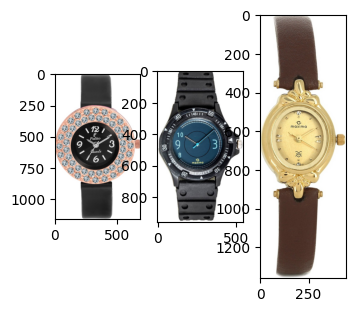

kitchen dining


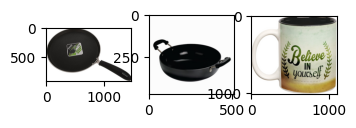

home furnishing


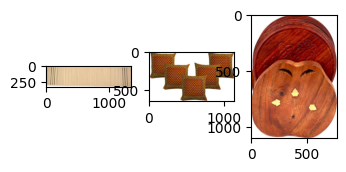

beauty personal care


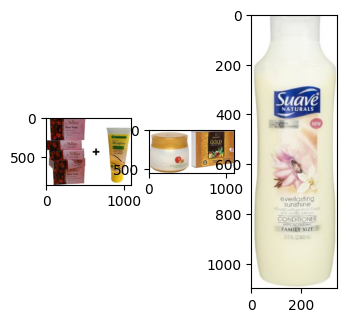

computer


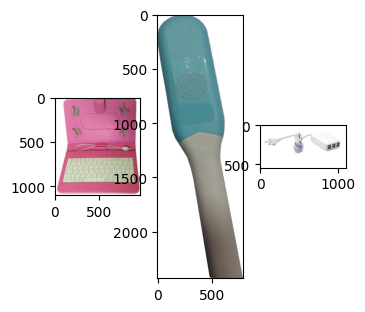

home decor festive need


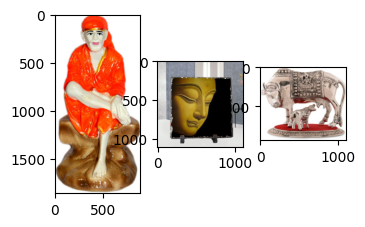

baby care


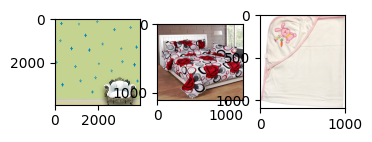

In [126]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

list_cloudy=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="watch"]
list_rain=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="kitchen dining"]
list_shine=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="home furnishing"]
list_sunrise=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="beauty personal care"]

for name in categories :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(150 + 1 + i)
        filename = path + list_fct(name)[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()



## Détermination et affichage des descripteurs SIFT

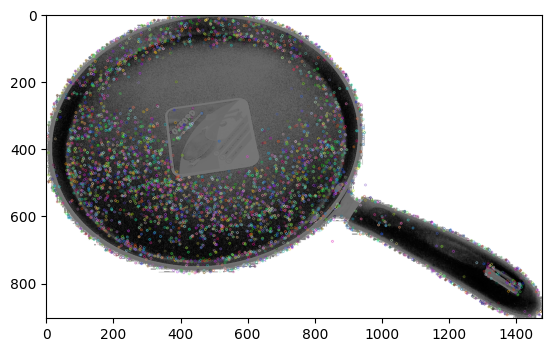

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [127]:
import cv2

sift =  cv2.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image SIFT

* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [140]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

0
100
200
300
400
500
600
700
800
900
1000


In [129]:
import pickle

In [142]:
data_2 = pd.DataFrame()
for k in sift_keypoints: 
    df=pd.DataFrame(k)
    data_2 = pd.concat([data_2, df], axis=0)

In [143]:
data_2.reset_index(drop=True)
sift_keypoints_all= data_2

In [144]:
pickle.dump(sift_keypoints, open("sift_keypoints.pkl", "wb"))
sift_keypoints=pickle.load(open("sift_keypoints.pkl", 'rb'))

## Création des clusters de descripteurs SIFT
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [145]:
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
k

719

In [146]:
pd.DataFrame(sift_keypoints_all).isnull().sum().sort_values(ascending = False)[0:30]

0     0
1     0
94    0
93    0
92    0
91    0
90    0
89    0
88    0
87    0
86    0
85    0
84    0
83    0
82    0
81    0
80    0
79    0
78    0
77    0
76    0
75    0
74    0
73    0
72    0
71    0
70    0
69    0
68    0
67    0
dtype: int64

In [165]:
sift_keypoints

[array([[ 8.,  8., 10., ...,  4.,  1.,  3.],
        [ 0., 10., 49., ...,  0.,  0.,  1.],
        [10., 11.,  5., ...,  1.,  0.,  0.],
        ...,
        [28.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [27.,  1.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  1.,  2., ...,  9., 21.,  5.],
        [96., 20.,  0., ...,  9.,  2.,  0.],
        [55., 16.,  0., ...,  0.,  1.,  0.],
        ...,
        [88.,  9.,  0., ...,  0.,  4., 16.],
        [ 3.,  1.,  0., ...,  0.,  0.,  0.],
        [13.,  0.,  0., ...,  0.,  0.,  2.]], dtype=float32),
 array([[ 1.,  2.,  6., ...,  0.,  2., 70.],
        [ 3.,  4.,  5., ...,  1.,  8., 14.],
        [58.,  9.,  5., ..., 20., 34., 14.],
        ...,
        [ 8., 17., 30., ...,  7., 12.,  9.],
        [62., 74., 10., ..., 26., 38., 25.],
        [27., 20., 34., ..., 43.,  8.,  4.]], dtype=float32),
 array([[ 24.,  65.,  75., ...,   0.,   0.,  40.],
        [ 59.,  67.,   0., ...,   1.,   1.,   1.]

In [147]:
sift_keypoints_all

0     1      2     3     4      5     6      7      8      9    ...  \
0     8.0   8.0   10.0   4.0   0.0    0.0  79.0   94.0    4.0    3.0  ...   
1     0.0  10.0   49.0   7.0   0.0    0.0   0.0    0.0    0.0   10.0  ...   
2    10.0  11.0    5.0   2.0   1.0    2.0  38.0  105.0    3.0    5.0  ...   
3     3.0  31.0  107.0  37.0  16.0   26.0   5.0    3.0   25.0   83.0  ...   
4    13.0  23.0   11.0   4.0  28.0  130.0   9.0    3.0   48.0   47.0  ...   
..    ...   ...    ...   ...   ...    ...   ...    ...    ...    ...  ...   
496   0.0  22.0   44.0  34.0   0.0    0.0   0.0    0.0    0.0    2.0  ...   
497  45.0   2.0    0.0   0.0   5.0   43.0  39.0   87.0   86.0   14.0  ...   
498  47.0  11.0    4.0   5.0  19.0   12.0  14.0   42.0  110.0    2.0  ...   
499   8.0  14.0   17.0   8.0  14.0   21.0  20.0   11.0  139.0   23.0  ...   
500  80.0  77.0    0.0   1.0   1.0   10.0  16.0   13.0  106.0  136.0  ...   

      118   119   120    121    122   123   124   125   126   127  
0     0.0  17.0  15.0   15.0   30.0  83.0  36.0   4.0   1.0   3.0  
1    19.0  61.0   6.0   23.0   91.0   9.0   0.0   0.0   0.0   1.0  
2     1.0   2.0  39.0   63.0   16.0  46.0  28.0   1.0   0.0   0.0  
3     1.0  22.0  53.0   25.0   14.0  30.0  14.0  10.0  12.0  41.0  
4    10.0  14.0   2.0    3.0   17.0  91.0  16.0   6.0   2.0   1.0  
..    ...   ...   ...    ...    ...   ...   ...   ...   ...   ...  
496   0.0   0.0  11.0  100.0  109.0  23.0   0.0   1.0   3.0   3.0  
497  32.0  32.0  25.0    3.0    0.0   0.0   0.0   0.0   2.0  16.0  
498   1.0  14.0  84.0   17.0    1.0   0.0   0.0   1.0   1.0  27.0  
499   6.0  41.0  10.0   17.0    7.0   0.0   0.0   0.0   0.0   2.0  
500   0.0  47.0  21.0   21.0   20.0  31.0  23.0   6.0   1.0   5.0  

[516851 rows x 128 columns]

In [148]:
from sklearn import cluster, metrics
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...


C:\Users\utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :            11.75 secondes


## Création des features des images SIFT
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [149]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.39 secondes


In [150]:
hist_vectors

[array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.034, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.   ,
        0.002, 0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.006,
        0.002, 0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002,
        0.006, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.002,
        0.002, 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.012,
        0.03 , 0.   , 0.   , 0.   , 0.   , 0.006, 0.   , 0.   , 0.   ,
        0.002, 0.002, 0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.01 ,
        0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.002, 0.   , 0.   , 0.018, 0.   , 0.   , 0.   , 0.   , 0.002,
      

## Réductions de dimension SIFT

### Réduction de dimension PCA SIFT
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [151]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1049, 719)
Dimensions dataset après réduction PCA :  (1049, 500)


### Réduction de dimension T-SNE SIFT
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [180]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

(1049, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images SIFT
* Les catégories "cloudy" et "rain" sont partiellement séparées

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16420\4025585272.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


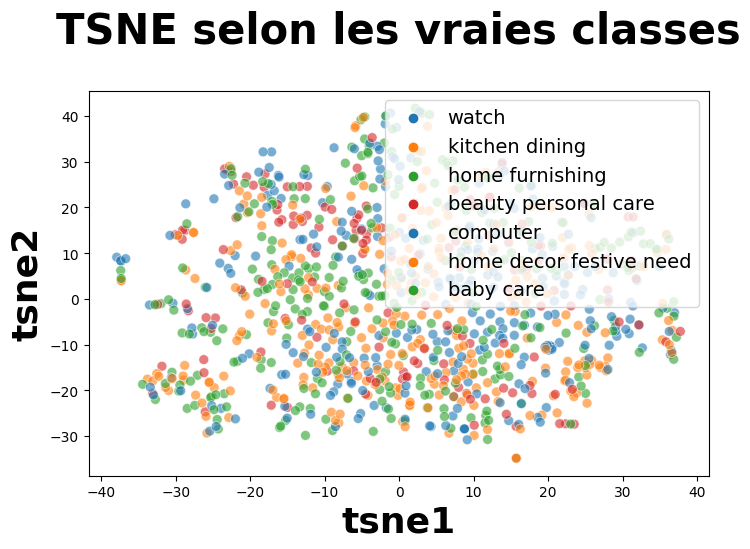

In [181]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters SIFT

###  Création de clusters à partir du T-SNE SIFT

In [182]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=4, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1049, 4)


C:\Users\utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters SIFT
* Le score ARI de 0.15 reste faible

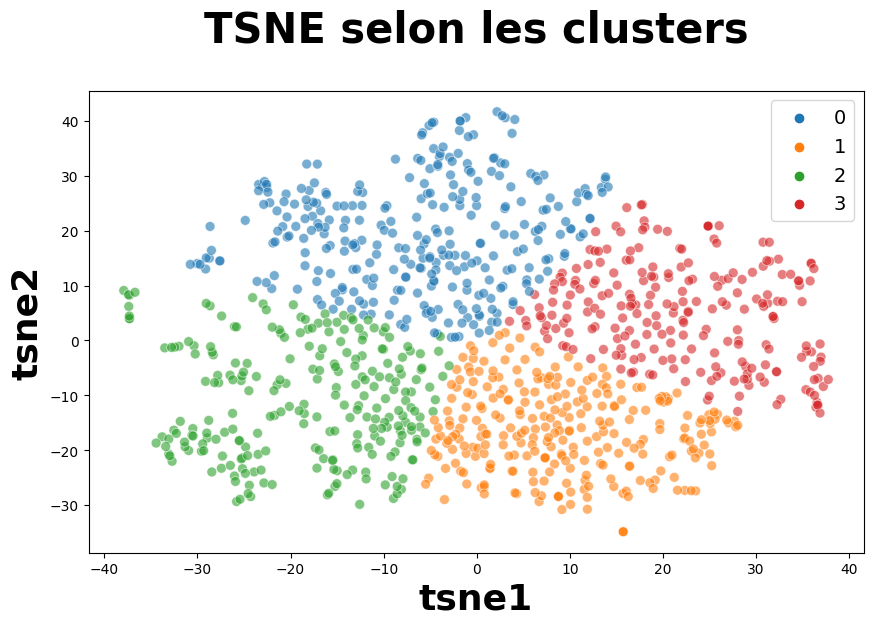

ARI :  0.012466782933219985


In [183]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# Pré-traitement des images via ORBE

In [184]:
# https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf

In [185]:
# Convert the training image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(image_rgb)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

In [ ]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(image_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(image_rgb)
keypoints_with_size = np.copy(image_rgb)

cv2.drawKeypoints(image_rgb, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(image_rgb, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [187]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(image_rgb, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

In [212]:
train_descriptors = orb.compute(image_gray, train_keypoints)[1]

In [218]:
train_descriptors

array([[127, 156, 240, ..., 174, 227, 215],
       [  3, 143,   2, ...,  12,  41, 143],
       [ 75, 155, 102, ..., 180,  45, 223],
       ...,
       [114, 237, 104, ..., 120, 222,  78],
       [  2,  29, 114, ...,  76, 177, 217],
       [128, 197,  11, ...,   8, 176,  40]], dtype=uint8)

## Création des clusters de descripteurs ORB
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [219]:
# data_3 = pd.DataFrame()
# for k in result: 
#     df=pd.DataFrame(k)
#     data_3 = pd.concat([data_3, df], axis=0)

# data_3.reset_index(drop=True)

In [220]:
k = int(round(np.sqrt(len(train_descriptors)),0))
k

22

In [222]:
# pd.DataFrame(train_descriptors).isnull().sum().sort_values(ascending = False)[0:30]

In [223]:
from sklearn import cluster, metrics
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(train_descriptors)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(train_descriptors)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  22
Création de 22 clusters de descripteurs ...
temps de traitement kmeans :             0.13 secondes


C:\Users\utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Création des features des images ORB
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [224]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(train_descriptors) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0


ValueError: Expected 2D array, got 1D array instead:
array=[127. 156. 240. 225. 245. 183. 218.  83.  27. 107. 189.  58. 158. 158.
 246. 112. 255. 189. 151. 177. 188.  62. 232. 214. 223. 221. 171. 254.
 151. 174. 227. 215.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [201]:
# hist_vectors

## Réductions de dimension ORB

### Réduction de dimension PCA ORB
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [195]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1049, 719)
Dimensions dataset après réduction PCA :  (1049, 500)


### Réduction de dimension T-SNE ORB
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [196]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

(1049, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images ORB
* Les catégories "cloudy" et "rain" sont partiellement séparées

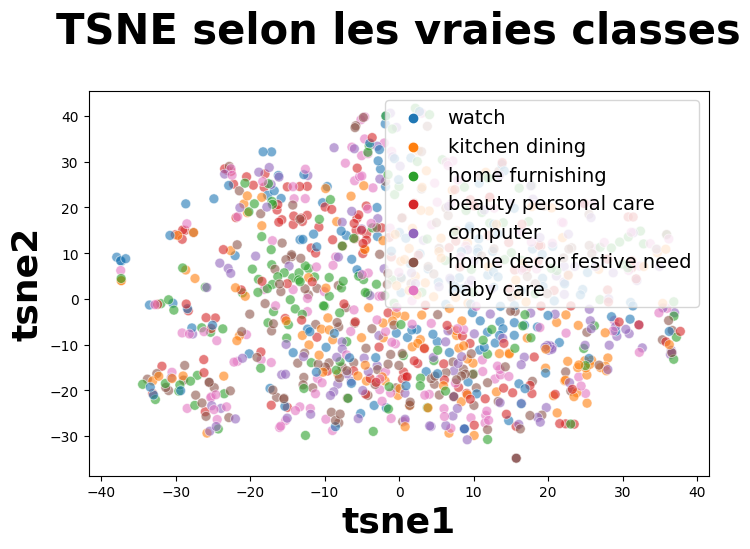

In [197]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters ORB
* Le score ARI de 0.15 reste faible

In [208]:
df_tsne['cluster'] = kmeans.labels_

ValueError: Length of values (516851) does not match length of index (1049)

In [206]:
# df_tsne["class"] = data["label_name"]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="kmeans",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, data["label_name"]))

ValueError: Could not interpret value `kmeans` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

# 3_Vecrorisation texte

In [ ]:
df['description'].head()

In [ ]:
# !pip install --upgrade gensim

## Doc2Vec Model

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess

# Preprocess the text data
docs = [simple_preprocess(desc) for desc in df['description']]

# Create tagged documents
tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]

# Train the Doc2Vec model
model = Doc2Vec(tagged_docs, vector_size=300, window=5, min_count=5, epochs=10)

# Get the document vectors
doc_vectors = [model.infer_vector(doc) for doc in docs]
doc_vectors

## TF-IDF vectorizer or count vectorizer bag-of-words representation with the Doc2Vec model 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

# Vectorize the text data using TF-IDF or count vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['description'])

count_vectorizer = CountVectorizer()
count_features = count_vectorizer.fit_transform(df['description'])

In [ ]:
count_features.toarray()

In [ ]:
tfidf_features.toarray()

# Annexe : descripteurs SIFT en DF

# Sift(image)

In [ ]:
doc_vectors
type(sift_keypoints)

In [ ]:
sift_keypoints

In [ ]:
# for item in sift_keypoints:
#     print(len(item))

In [ ]:
keypoints_list = []
for item in sift_keypoints:
    keypoints_list.append([vector.tolist() for vector in item])

# Convertir en Numpy array
keypoints_array = np.array(keypoints_list, dtype=object)

In [ ]:
keypoints_array

In [ ]:
del list_photos[635]

In [135]:
# import cv2

# def get_descriptors(image, detector):
    
#     img = cv2.imread(path+image)
#     kp, des = detector.detectAndCompute(img, None)


#     # returns descriptors of an image
#     return des

# detector = cv2.SIFT_create(500)
# desc = np.array([])

# # desc_src_img is a list which says which image a descriptor belongs to
# desc_src_img = []
# for i in range (len(list_photos)):
#     print('\r', f"{i+1}/{len(list_photos)}", end="")
#     img = list_photos[i]
#     descriptors = get_descriptors(img, detector)

#     if len(desc) == 0:
#         desc = np.array(descriptors)
#     else:
#         desc = np.vstack((desc, descriptors))

#     # Keep track of which image a descriptor belongs to
#     for j in range(len(descriptors)):
#         desc_src_img.append(i)

# # important, cv2.kmeans only accepts type32 descriptors
# desc = np.float32(desc)

# # Clustering
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.01)

# flags = cv2.KMEANS_PP_CENTERS
# dictionary_size=1049

# # desc is a type32 numpy array of vstacked descriptors
# compactness, labels, dictionary = cv2.kmeans(desc, dictionary_size, None, criteria, 1, flags)

# # Getting histograms from labels
# size = labels.shape[0] * labels.shape[1]

# imgs_data = [np.zeros((dictionary_size, 1)) for i in range(len(list_photos))]
# df["bovw_SIFT"] = ""
# for i in range(size):
#     label = labels[i]
#     # Get this descriptors image id
#     img_id = desc_src_img[i]
#     # imgs_data is a list of the same size as the number of images
#     data_img = imgs_data[img_id]
#     # data is a numpy array of size (dictionary_size, 1) filled with zeros
#     data_img[label] += 1
#     df["bovw_SIFT"][img_id] = data_img.flatten()


 1049/1049

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16420\4219115139.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bovw_SIFT"][img_id] = data_img.flatten()


In [136]:
df.head()

index                           uniq_id            crawl_timestamp  \
0    280  009099b1f6e1e8f893ec29a7023153c4  2016-04-24 18:34:50 +0000   
1     86  0096e89cc25a8b96fb9808716406fe94  2016-06-17 14:13:36 +0000   
2    724  00cbbc837d340fa163d11e169fbdb952  2016-01-01 19:37:22 +0000   
3    820  00d84a518e0550612fcfcba3b02b6255  2015-12-12 11:46:53 +0000   
4    423  00e966a5049a262cfc72e6bbf68b80e7  2016-06-17 07:53:02 +0000   

                                         product_url  \
0  http://www.flipkart.com/palito-plo-166-analog-...   
1  http://www.flipkart.com/oxford-tawa-15-cm-diam...   
2  http://www.flipkart.com/flazee-home-trends-bei...   
3  http://www.flipkart.com/mxofere-combo-rose-soa...   
4  http://www.flipkart.com/ygs-keyboard-case-asus...   

                                        product_name  \
0    palito PLO 166 Analog Watch  - For Girls, Women   
1                      oxford Tawa 15 cm cm diameter   
2    Flazee Home Trends Beige 144.78 cm Table Runner   
3  Mxofere Combo Rose Soap And Aloevera Lemon Fac...   
4        YGS Keyboard Case for Asus Memo Pad 7in Tab   

                               product_category_tree               pid  \
0  ["Watches >> Wrist Watches >> palito Wrist Wat...  WATEHZPFAPQKUASQ   
1  ["Kitchen & Dining >> Cookware >> Pots & Pans ...  PTPEJQR9VKFUV4HY   
2  ["Home Furnishing >> Kitchen & Dining Linen >>...  TBRE8GR3RSTQTXMJ   
3  ["Beauty and Personal Care >> Combos and Kits ...  CBKEBVA8PUFUPRW4   
4  ["Computers >> Tablet Accessories >> Cases & C...  ACCEJGH6JVTM4CBH   

   retail_price  discounted_price  \
0        1500.0             199.0   
1         699.0             659.0   
2        1299.0             399.0   
3         285.0             285.0   
4        1000.0             499.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/watch/a/s/q/...                    False   
1  ["http://img6a.flixcart.com/image/pot-pan/4/h/...                    False   
2  ["http://img6a.flixcart.com/image/table-runner...                    False   
3  ["http://img6a.flixcart.com/image/combo-kit/r/...                    False   
4  ["http://img5a.flixcart.com/image/cases-covers...                    False   

                                         description       product_rating  \
0  specification palito plo analog watch girl wom...  No rating available   
1  key feature oxford tawa cm cm diameter nonstic...  No rating available   
2  buy flazee home trend beige cm table runner r ...  No rating available   
3  buy mxofere combo rose soap aloevera lemon fac...  No rating available   
4  key feature ygs keyboard case asus memo pad ta...  No rating available   

        overall_rating               brand  \
0  No rating available              palito   
1  No rating available              oxford   
2  No rating available  Flazee Home Trends   
3  No rating available                 NaN   
4  No rating available                 YGS   

                              product_specifications                 label  \
0  {"product_specification"=>[{"key"=>"Type", "va...                 watch   
1  {"product_specification"=>[{"key"=>"Pan Type",...        kitchen dining   
2  {"product_specification"=>[{"key"=>"Shape", "v...       home furnishing   
3  {"product_specification"=>[{"key"=>"Organic Ty...  beauty personal care   
4  {"product_specification"=>[{"key"=>"Brand", "v...              computer   

                                           bovw_SIFT  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...  
4  [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [137]:
pickle.dump(df, open("df.pkl", "wb"))
df=pickle.load(open("df.pkl", 'rb'))